In [48]:
# import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# read the datset file

df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
# check the number of row and column

df.shape

# here we have 768 rows and 9 columns

(768, 9)

# Visualization

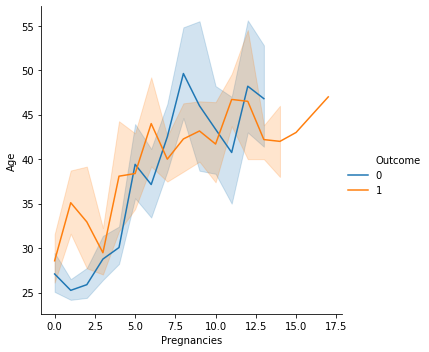

In [52]:
# check the how age and pregnancies affect the Outcome i.e. daibetes

sns.relplot(data=df,y='Age',x='Pregnancies',hue='Outcome',kind='line');

# where we can observe that as the value in age and Pregnancies increase Daibetes is also increase
# or we can say that it is equally affect

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

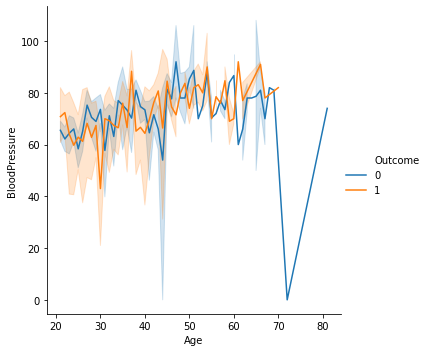

In [59]:
# Lets check at what blood pressure Outcome is positive

sns.relplot(data=df,y='BloodPressure',x='Age',kind='line',hue='Outcome');

# we observe that when the bloodpressure increase more than 60 the chances of being diabetes is more

# Lets create a LogisticRegression Model

In [62]:
# split the dependent and independent data

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# import all library

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.35, random_state=0)

# create LogisticRegression object and fit the training data
lr = LogisticRegression().fit(x_train, y_train)

# check model accuracy
print(lr.score(x_test, y_test))

# lets predoct the test data
y_pred = lr.predict(x_test)

# find the accuracy_score and classification report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

tn,fp,fn,tp= confusion_matrix(y_test,y_pred).ravel()
print(tp,fn)
print(fp,tn)

0.7955390334572491
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       180
           1       0.77      0.54      0.64        89

    accuracy                           0.80       269
   macro avg       0.79      0.73      0.75       269
weighted avg       0.79      0.80      0.78       269

0.7955390334572491
48 41
14 166


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# but still we can try to make model good

Pregnancies : 0.8999119408414357


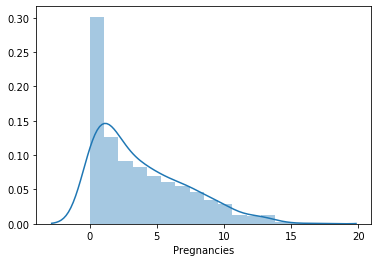

Glucose : 0.17341395519987735


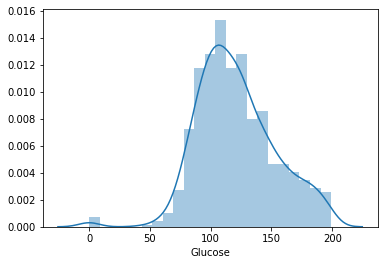

BloodPressure : -1.8400052311728738


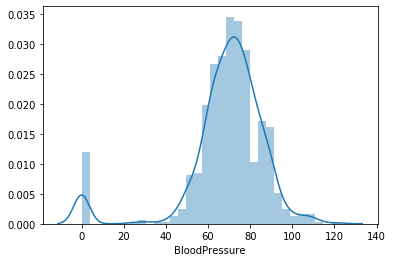

SkinThickness : 0.109158762323673


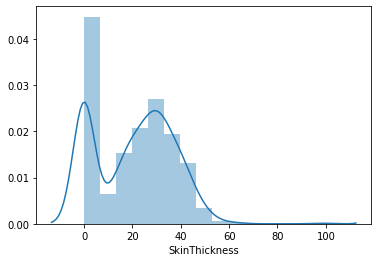

Insulin : 2.2678104585131753


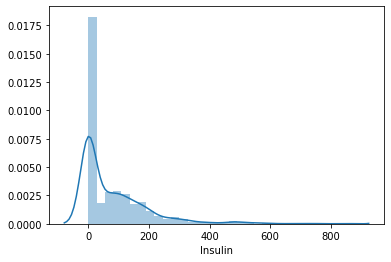

BMI : -0.42814327880861786


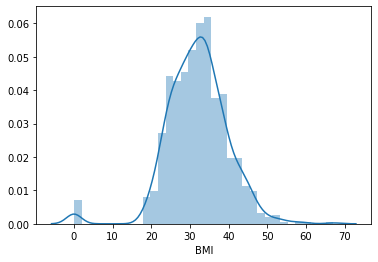

DiabetesPedigreeFunction : 1.9161592037386292


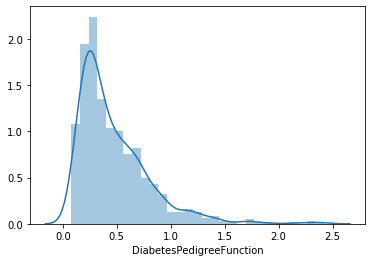

Age : 1.127389259531697


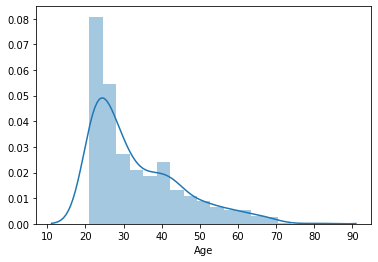

Outcome : 0.6337757030614577


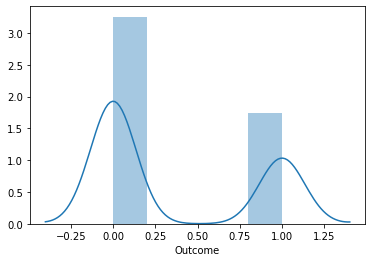

In [70]:
# lets check the skewn value of each column

from scipy.stats import skew
for col in df:
    print(col,':',skew(df[col]))
    sns.distplot(df[col])
    plt.show()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.251033,148,72,35,0,33.6,0.627,50,1
1,1.000000,85,66,29,0,26.6,0.351,31,0
2,1.296840,183,64,0,0,23.3,0.672,32,1
3,1.000000,89,66,23,94,28.1,0.167,21,0
4,0.000000,137,40,35,168,43.1,2.288,33,1


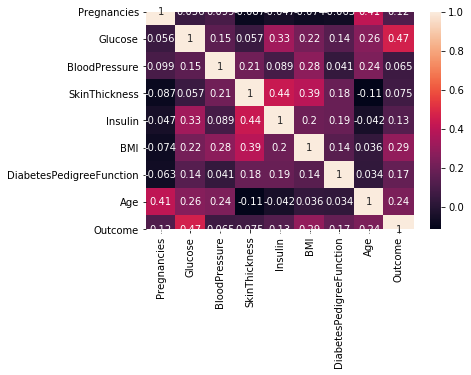

In [80]:
# positive skew --> Pregnancies, Insulin, DiabetesPedigreeFunction, Age
# negative skewness --> BloodPressure
sns.heatmap(data=df.corr(),annot=True);
# pregnancies, Age

df['Pregnancies'] = np.sqrt(df['Pregnancies'])
df.head()

In [79]:
# after reducing skewness lets again find model accuracy and its score

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# import all library

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.35, random_state=0)

# create LogisticRegression object and fit the training data
lr = LogisticRegression().fit(x_train, y_train)

# check model accuracy
print(lr.score(x_test, y_test))

# lets predoct the test data
y_pred = lr.predict(x_test)

# find the accuracy_score and classification report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

tn,fp,fn,tp= confusion_matrix(y_test,y_pred).ravel()
print(tp,fn)
print(fp,tn)

0.7843866171003717
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       180
           1       0.74      0.54      0.62        89

    accuracy                           0.78       269
   macro avg       0.77      0.72      0.74       269
weighted avg       0.78      0.78      0.77       269

0.7843866171003717
48 41
17 163


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### it is giving bad output as compre to previous so we assume our model is best at value 0.

# Lets check our model works perfact or not by giving some mannual input

In [47]:
# expected --> 1

x1 = np.array([8,183,64,0,0,23.3,0.672,32]).reshape(1,8)
lr.predict(x1)

# predicted --> 1 gives perfact output

array([1], dtype=int64)